# Importing the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BA 830 - Team Project/Music_experiment_responses_csv.csv')

df.head(2)


,Timestamp,Treatment / Control,Age,Gender,Language,Is a quiet environment important for you when working on tasks?,How often do you listen to music while working?,Time Taken for Task 1 - Countdown (in seconds),Score for Task 1 - Countdown (out of 14),Time Taken for Task 2 - Card Sorting (in seconds),Score for Task 2 - Card Sorting (out of 52),How stressed did you feel while completing the tasks?,How enjoyable did you find the tasks?,How focused did you feel while completing the tasks?,Additional Comments
0,2/26/2025 12:11:07,Treatment,23,Male,Marathi,No,3,37,13,78,52,2,3,1,NaN
1,2/26/2025 12:26:48,Control,23,Male,Telugu,Yes,7,124,8,73,30,6,2,3,NaN


# Cleaning

In [ ]:
# Create 'treatment' column (1 for treatment, 0 for control)
df['treatment'] = df['Treatment / Control'].apply(lambda x: 1 if x == 'Treatment' else 0)

# Create 'quiet_environment' column (1 for important, 0 for not important)
df['quiet_environment'] = df['Is a quiet environment important for you when working on tasks?'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head(2)


,Timestamp,Treatment / Control,Age,Gender,Language,Is a quiet environment important for you when working on tasks?,How often do you listen to music while working?,Time Taken for Task 1 - Countdown (in seconds),Score for Task 1 - Countdown (out of 14),Time Taken for Task 2 - Card Sorting (in seconds),Score for Task 2 - Card Sorting (out of 52),How stressed did you feel while completing the tasks?,How enjoyable did you find the tasks?,How focused did you feel while completing the tasks?,Additional Comments,treatment,quiet_environment
0,2/26/2025 12:11:07,Treatment,23,Male,Marathi,No,3,37,13,78,52,2,3,1,NaN,1,0
1,2/26/2025 12:26:48,Control,23,Male,Telugu,Yes,7,124,8,73,30,6,2,3,NaN,0,1


In [ ]:
df = df.drop(columns=['Timestamp', 'Treatment / Control', 'Is a quiet environment important for you when working on tasks?', 'Additional Comments'])
df.head(2)


,Age,Gender,Language,How often do you listen to music while working?,Time Taken for Task 1 - Countdown (in seconds),Score for Task 1 - Countdown (out of 14),Time Taken for Task 2 - Card Sorting (in seconds),Score for Task 2 - Card Sorting (out of 52),How stressed did you feel while completing the tasks?,How enjoyable did you find the tasks?,How focused did you feel while completing the tasks?,treatment,quiet_environment
0,23,Male,Marathi,3,37,13,78,52,2,3,1,1,0
1,23,Male,Telugu,7,124,8,73,30,6,2,3,0,1


In [ ]:
set(df['Language'])

{'CHINESE',
 'Chinese',
 'Engish',
 'English',
 'English ',
 'English, Hindi',
 'Gujarati ',
 'Hindi',
 'Korean',
 'Marathi',
 'Spanish',
 'Telugu',
 'Tibetan',
 'Urdu',
 'Vietnamese'}

In [ ]:
# Clean and standardize the 'Language' column
df["Language"] = (
    df["Language"]
    .str.strip()  # Remove leading and trailing spaces
    .str.title()  # Standardize capitalization
    .str.replace(r'\s*,\s*Hindi', '', regex=True)  # Remove ', Hindi' if present
    .replace({"Engish": "English", "English, Hindi": "English"})  # Fix typos & simplify
)

In [ ]:
df['Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

df['Music_frequency'] = df['How often do you listen to music while working?']

df['countdown_time'] = df['Time Taken for Task 1 - Countdown (in seconds)']

df['countdown_score'] = df['Score for Task 1 - Countdown (out of 14)']

df['sorting_time'] = df['Time Taken for Task 2 - Card Sorting (in seconds)']

df['sorting_score'] = df['Score for Task 2 - Card Sorting (out of 52)']

df['stress'] = df['How stressed did you feel while completing the tasks?']

df['enjoyment'] = df['How enjoyable did you find the tasks?']

df['focus'] = df['How focused did you feel while completing the tasks?']


In [ ]:
df.head(2)

,Age,Gender,Language,How often do you listen to music while working?,Time Taken for Task 1 - Countdown (in seconds),Score for Task 1 - Countdown (out of 14),Time Taken for Task 2 - Card Sorting (in seconds),Score for Task 2 - Card Sorting (out of 52),How stressed did you feel while completing the tasks?,How enjoyable did you find the tasks?,...,quiet_environment,Male,Music_frequency,countdown_time,countdown_score,sorting_time,sorting_score,stress,enjoyment,focus
0,23,Male,Marathi,3,37,13,78,52,2,3,...,0,1,3,37,13,78,52,2,3,1
1,23,Male,Telugu,7,124,8,73,30,6,2,...,1,1,7,124,8,73,30,6,2,3


In [ ]:
df.columns

Index(['Age', 'Gender', 'Language',
       'How often do you listen to music while working?',
       'Time Taken for Task 1 - Countdown (in seconds)',
       'Score for Task 1 - Countdown (out of 14)',
       'Time Taken for Task 2 - Card Sorting (in seconds)',
       'Score for Task 2 - Card Sorting (out of 52)',
       'How stressed did you feel while completing the tasks?',
       'How enjoyable did you find the tasks?',
       'How focused did you feel while completing the tasks?', 'treatment',
       'quiet_environment', 'Male', 'Music_frequency', 'countdown_time',
       'countdown_score', 'sorting_time', 'sorting_score', 'stress',
       'enjoyment', 'focus'],
      dtype='object')

In [ ]:
dropping = ['Gender', 'How often do you listen to music while working?',       'Time Taken for Task 1 - Countdown (in seconds)',
       'Score for Task 1 - Countdown (out of 14)',
       'Time Taken for Task 2 - Card Sorting (in seconds)',
       'Score for Task 2 - Card Sorting (out of 52)',
       'How stressed did you feel while completing the tasks?',
       'How enjoyable did you find the tasks?',
       'How focused did you feel while completing the tasks?']

data = df.drop(columns=dropping, axis = 1).copy()

In [ ]:
data.head(2)

,Age,Language,treatment,quiet_environment,Male,Music_frequency,countdown_time,countdown_score,sorting_time,sorting_score,stress,enjoyment,focus
0,23,Marathi,1,0,1,3,37,13,78,52,2,3,1
1,23,Telugu,0,1,1,7,124,8,73,30,6,2,3


In [ ]:
data['Male'].value_counts()

,count
Male,
1,36
0,26


In [ ]:
data['Language'].value_counts()

,count
Language,
English,30
Hindi,10
Marathi,5
Korean,4
Telugu,3
Chinese,3
Spanish,3
Vietnamese,1
Tibetan,1


In [ ]:
%pip install stargazer

# ATE and CATE Using dataframes

ATE values for the various outcome variables

In [ ]:
data1 = df.copy()

In [ ]:
# outcome variables
outcome_variables = [
    "Score for Task 1 - Countdown (out of 14)",
    "Score for Task 2 - Card Sorting (out of 52)",
    "Time Taken for Task 1 - Countdown (in seconds)",
    "Time Taken for Task 2 - Card Sorting (in seconds)",
    "How stressed did you feel while completing the tasks?",
    "How enjoyable did you find the tasks?",
    "How focused did you feel while completing the tasks?"
]

ate_results = {}

for outcome in outcome_variables:
    ate = data1.loc[data['Treatment / Control'] == 1, outcome].mean() - \
          data1.loc[data['Treatment / Control'] == 0, outcome].mean()

    ate_results[outcome] = ate

ate_df = pd.DataFrame.from_dict(ate_results, orient="index", columns=["ATE"])
print(ate_df)

                                                          ATE
Score for Task 1 - Countdown (out of 14)             0.863114
Score for Task 2 - Card Sorting (out of 52)          0.637409
Time Taken for Task 1 - Countdown (in seconds)     -15.386625
Time Taken for Task 2 - Card Sorting (in seconds)    3.317659
How stressed did you feel while completing the ...   0.123302
How enjoyable did you find the tasks?                0.129572
How focused did you feel while completing the t...  -0.107628


Heatmap for ATE values

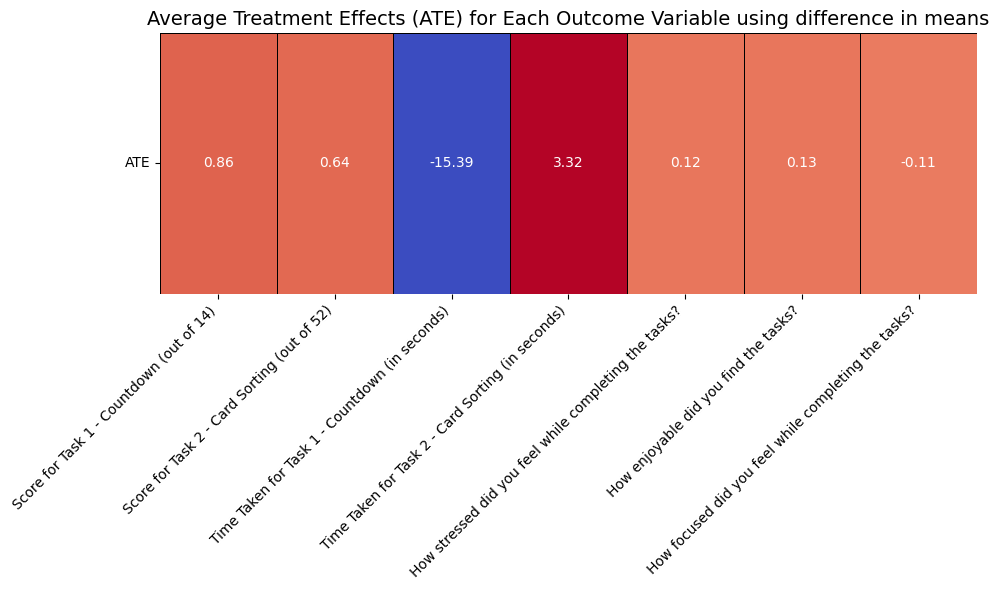

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ate_df = pd.DataFrame.from_dict(ate_results, orient="index", columns=["ATE"])

ate_df_transposed = ate_df.T

# Heatmap for ATE values
plt.figure(figsize=(10, 6))
sns.heatmap(ate_df_transposed, annot=True, cmap='coolwarm', fmt='.2f', cbar=False,
            linewidths=0.5, linecolor='black')

plt.title('Average Treatment Effects (ATE) for Each Outcome Variable using difference in means', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CATE results on the basis of gender

In [ ]:
outcome_variables = [
    "Score for Task 1 - Countdown (out of 14)",
    "Score for Task 2 - Card Sorting (out of 52)",
    "Time Taken for Task 1 - Countdown (in seconds)",
    "Time Taken for Task 2 - Card Sorting (in seconds)",
    "How stressed did you feel while completing the tasks?",
    "How enjoyable did you find the tasks?",
    "How focused did you feel while completing the tasks?"
]

cate_results = {'Male': {}, 'Female': {}}

for gender in ['Male', 'Female']:
    gender_data = data1[data1['Gender'] == gender]  # Filter data for each gender

    for outcome in outcome_variables:
        cate = gender_data.loc[gender_data['Treatment / Control'] == 1, outcome].mean() - \
               gender_data.loc[gender_data['Treatment / Control'] == 0, outcome].mean()

        cate_results[gender][outcome] = cate

cate_df = pd.DataFrame.from_dict(cate_results['Male'], orient='index', columns=['Male'])
cate_df['Female'] = pd.DataFrame.from_dict(cate_results['Female'], orient='index', columns=['Female'])

cate_df

,Male,Female
Score for Task 1 - Countdown (out of 14),-0.217391,2.4250
Score for Task 2 - Card Sorting (out of 52),1.518395,0.0000
Time Taken for Task 1 - Countdown (in seconds),-4.290970,-30.6125
Time Taken for Task 2 - Card Sorting (in seconds),4.725753,-1.1875
How stressed did you feel while completing the tasks?,-0.267559,0.8250
How enjoyable did you find the tasks?,-0.117057,0.9375
How focused did you feel while completing the tasks?,-0.227425,0.4875


Visual representation of CATE results

<Figure size 1200x600 with 0 Axes>

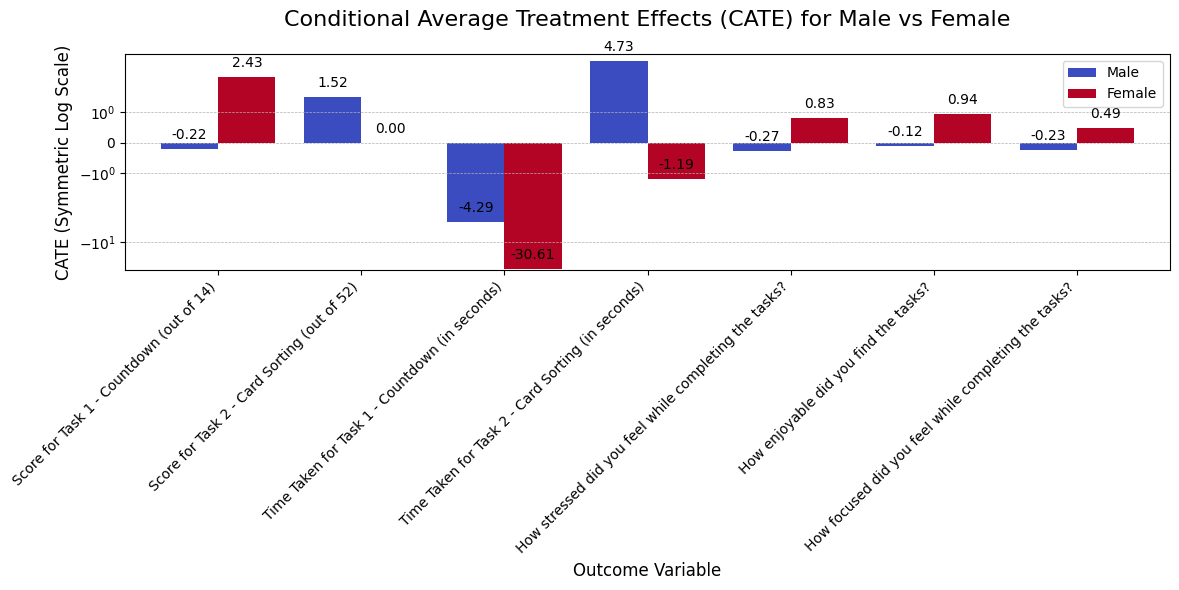

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

ax = cate_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# symmetric log transformation
plt.yscale('symlog')

plt.title('Conditional Average Treatment Effects (CATE) for Male vs Female', fontsize=16, pad=20)  # Adjust pad to move the title upward
plt.xlabel('Outcome Variable', fontsize=12)
plt.ylabel('CATE (Symmetric Log Scale)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format the value to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show();

# EDA

Distrubutions of all the outcome variables

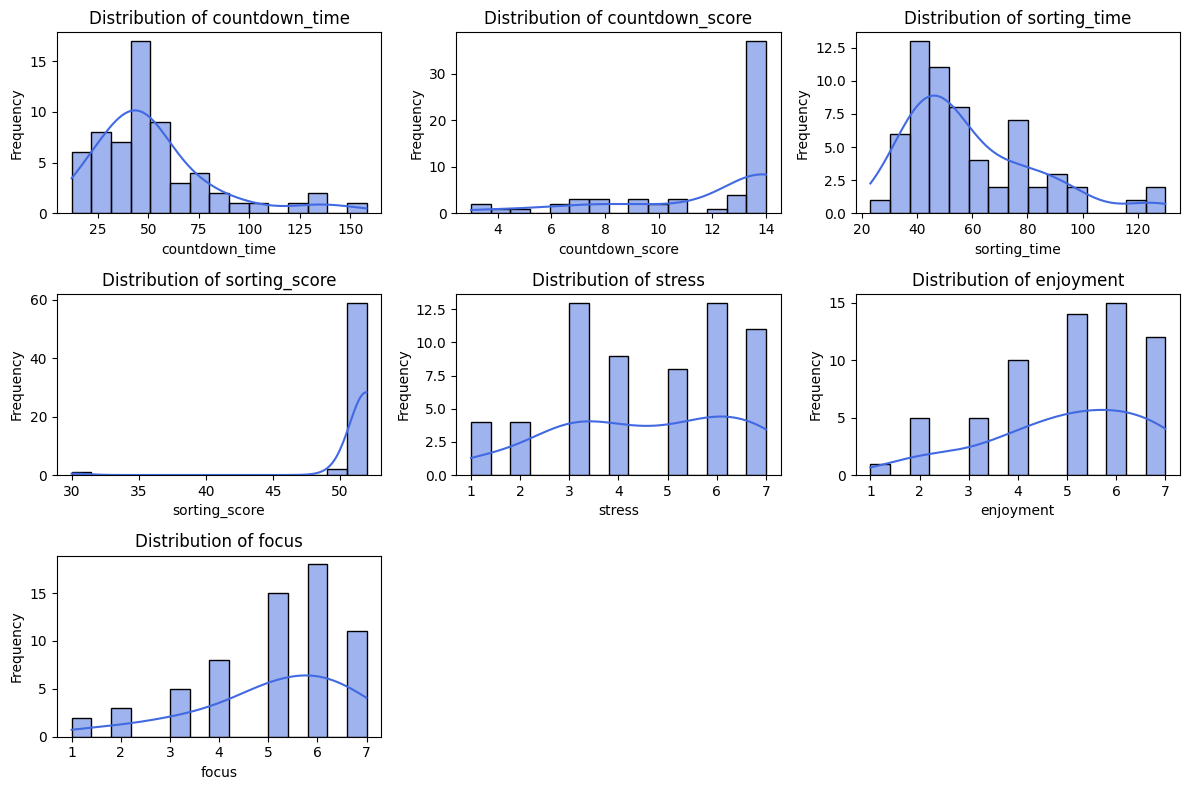

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

outcome_vars = ['countdown_time', 'countdown_score', 'sorting_time', 'sorting_score',
                'stress', 'enjoyment', 'focus']

plt.figure(figsize=(12, 8))

for i, col in enumerate(outcome_vars, 1):
    plt.subplot(3, 3, i)  # Arrange plots in a grid
    sns.histplot(data[col], kde=True, bins=15, color='royalblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

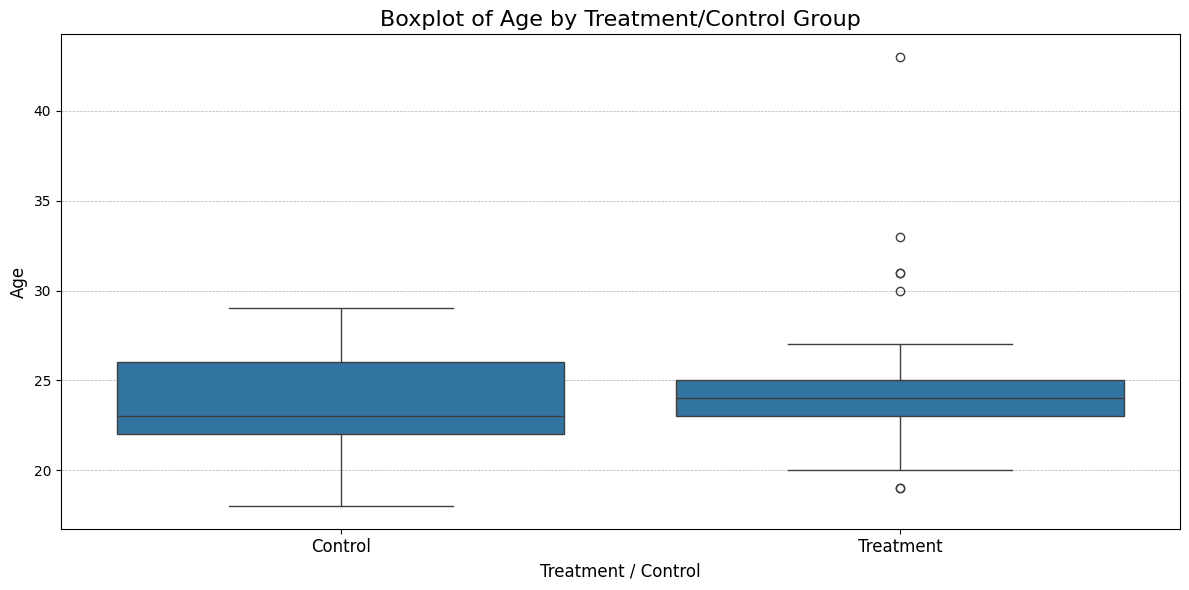

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Treatment / Control', y='Age', data=data)

plt.title('Boxplot of Age by Treatment/Control Group', fontsize=16)
plt.xlabel('Treatment / Control', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.xticks([0, 1], ['Control', 'Treatment'], fontsize=12)

plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

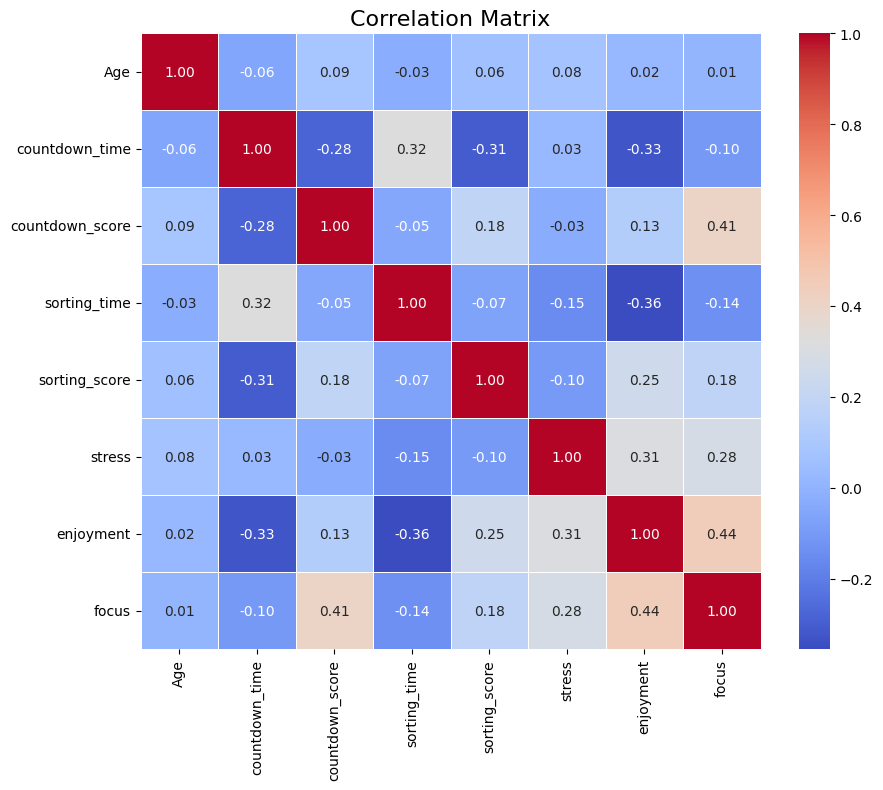

In [ ]:
corr_matrix = data[['Age', 'countdown_time', 'countdown_score', 'sorting_time', 'sorting_score', 'stress', 'enjoyment', 'focus']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<ipython-input-49-b555fd975166>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Language', data=data, palette='muted', order=data['Language'].value_counts().index)


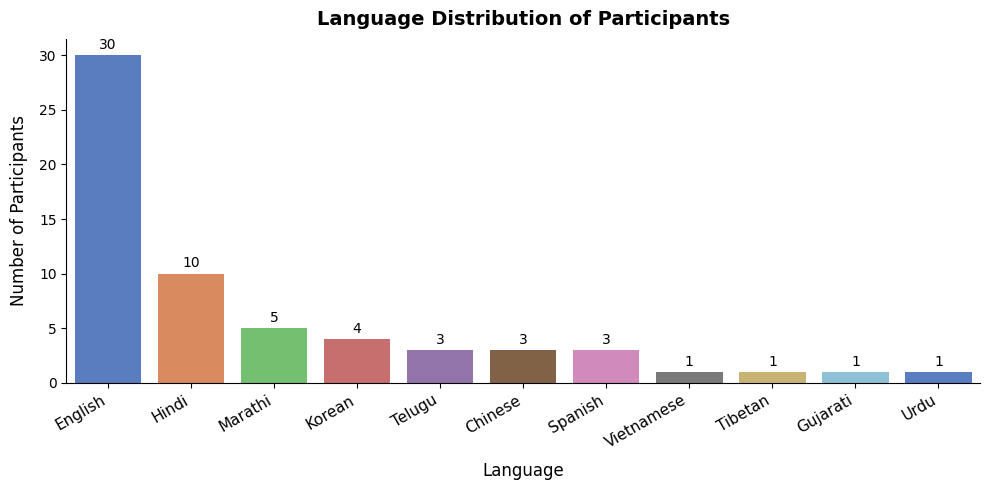

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

ax = sns.countplot(x='Language', data=data, palette='muted', order=data['Language'].value_counts().index)
plt.xticks(rotation=30, ha='right', fontsize=11)

plt.title('Language Distribution of Participants', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Language', fontsize=12, labelpad=8)
plt.ylabel('Number of Participants', fontsize=12, labelpad=8)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 0.3),
                ha='center', va='bottom', fontsize=10, color='black')

sns.despine()
plt.tight_layout()
plt.show()

<ipython-input-50-fe774f134e5f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Male', data=data, palette=custom_colors)


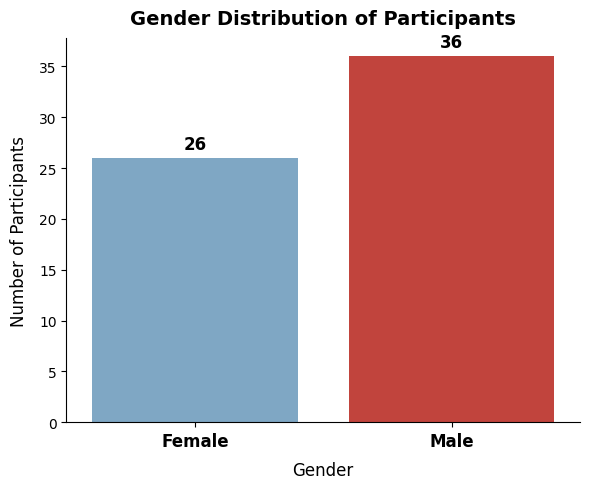

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

custom_colors = ['#74a9cf', '#d73027']

ax = sns.countplot(x='Male', data=data, palette=custom_colors)

plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12, fontweight='bold')

plt.title('Gender Distribution of Participants', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Gender', fontsize=12, labelpad=8)
plt.ylabel('Number of Participants', fontsize=12, labelpad=8)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

sns.despine()
plt.tight_layout()
plt.show()

# T-test

Conducting T-Test for every outcome variable

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind
from tabulate import tabulate

outcome_vars = ['countdown_time', 'countdown_score', 'sorting_time', 'sorting_score', 'stress', 'enjoyment', 'focus']
alpha = 0.05

t_test_results = []

for outcome_var in outcome_vars:
    treated_sample = data[data['Treatment / Control'] == 1][outcome_var]
    control_sample = data[data['Treatment / Control'] == 0][outcome_var]

    tstat, pvalue, df = ttest_ind(treated_sample, control_sample, alternative='two-sided', usevar='pooled')

    reject = "Yes" if pvalue < alpha else "No"

    mean_diff = np.mean(treated_sample) - np.mean(control_sample)
    std_err_diff = np.sqrt(np.var(treated_sample, ddof=1)/len(treated_sample) + np.var(control_sample, ddof=1)/len(control_sample))

    t_crit = 1.96

    CI_lower = mean_diff - t_crit * std_err_diff
    CI_upper = mean_diff + t_crit * std_err_diff

    t_test_results.append([outcome_var, round(tstat, 3), round(pvalue, 4), reject, round(CI_lower, 3), round(CI_upper, 3)])

t_test_results_df = pd.DataFrame(t_test_results, columns=['Outcome Variable', 't-score', 'p-value', 'Reject H₀', 'CI Lower', 'CI Upper'])

print("\nT-Test Results for Treatment vs. Control\n")
print(tabulate(t_test_results_df, headers='keys', tablefmt='grid'))


T-Test Results for Treatment vs. Control

+----+--------------------+-----------+-----------+-------------+------------+------------+
|    | Outcome Variable   |   t-score |   p-value | Reject H₀   |   CI Lower |   CI Upper |
+====+====================+===========+===========+=============+============+============+
|  0 | countdown_time     |    -2.058 |    0.044  | Yes         |    -30.618 |     -0.155 |
+----+--------------------+-----------+-----------+-------------+------------+------------+
|  1 | countdown_score    |     1.033 |    0.3059 | No          |     -0.781 |      2.508 |
+----+--------------------+-----------+-----------+-------------+------------+------------+
|  2 | sorting_time       |     0.546 |    0.5873 | No          |     -8.419 |     15.055 |
+----+--------------------+-----------+-----------+-------------+------------+------------+
|  3 | sorting_score      |     0.89  |    0.3769 | No          |     -0.859 |      2.133 |
+----+--------------------+----------

# Statistical Power

Calculating Statistical Power

In [ ]:
from statsmodels.stats.power import TTestPower
import numpy as np

outcome_vars = ['countdown_time', 'countdown_score', 'sorting_time', 'sorting_score', 'stress', 'enjoyment', 'focus']

alpha = 0.05

power_results = []

for outcome_var in outcome_vars:
    n_treated = len(data[data['Treatment / Control'] == 1])
    n_control = len(data[data['Treatment / Control'] == 0])
    n = min(n_treated, n_control)

    mean_treated = np.mean(data[data['Treatment / Control'] == 1][outcome_var])
    mean_control = np.mean(data[data['Treatment / Control'] == 0][outcome_var])

    sd_treated = np.std(data[data['Treatment / Control'] == 1][outcome_var], ddof=1)
    sd_control = np.std(data[data['Treatment / Control'] == 0][outcome_var], ddof=1)
    pooled_sd = np.sqrt(((n_treated - 1) * sd_treated**2 + (n_control - 1) * sd_control**2) / (n_treated + n_control - 2))

    effect_size = (mean_treated - mean_control) / pooled_sd

    power = TTestPower().power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')

    power_results.append([outcome_var, round(effect_size, 3), round(power, 3)])

power_results_df = pd.DataFrame(power_results, columns=['Outcome Variable', 'Effect Size (Cohen\'s d)', 'Power'])

from tabulate import tabulate
print("\nStatistical Power for Each Outcome Variable\n")
print(tabulate(power_results_df, headers='keys', tablefmt='grid'))


Statistical Power for Each Outcome Variable

+----+--------------------+---------------------------+---------+
|    | Outcome Variable   |   Effect Size (Cohen's d) |   Power |
+====+====================+===========================+=========+
|  0 | countdown_time     |                    -0.524 |   0.777 |
+----+--------------------+---------------------------+---------+
|  1 | countdown_score    |                     0.263 |   0.277 |
+----+--------------------+---------------------------+---------+
|  2 | sorting_time       |                     0.139 |   0.112 |
+----+--------------------+---------------------------+---------+
|  3 | sorting_score      |                     0.227 |   0.218 |
+----+--------------------+---------------------------+---------+
|  4 | stress             |                     0.067 |   0.064 |
+----+--------------------+---------------------------+---------+
|  5 | enjoyment          |                     0.081 |   0.071 |
+----+--------------------+---

# Countdown analysis

In [ ]:
# Linear regression with statsmodels
import statsmodels.api as sm

lm = sm.OLS.from_formula("countdown_time ~ treatment", data = data)
fit = lm.fit()
#fit.summary()


In [ ]:
from stargazer.stargazer import Stargazer
lm_age = sm.OLS.from_formula("countdown_time ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])


In [ ]:
from stargazer.stargazer import Stargazer
lm_male = sm.OLS.from_formula("countdown_time ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Card sorting analysis

In [ ]:
lm = sm.OLS.from_formula("sorting_time ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("sorting_time ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:
from stargazer.stargazer import Stargazer
lm_male = sm.OLS.from_formula("sorting_time ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Stress analysis

In [ ]:
lm = sm.OLS.from_formula("stress ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("stress ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:
from stargazer.stargazer import Stargazer
lm_male = sm.OLS.from_formula("stress ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Enjoyment analysis

In [ ]:
lm = sm.OLS.from_formula("enjoyment ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("enjoyment ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:
from stargazer.stargazer import Stargazer
lm_male = sm.OLS.from_formula("enjoyment ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Focus levels analysis

In [ ]:
lm = sm.OLS.from_formula("focus ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("focus ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:

lm_male = sm.OLS.from_formula("focus ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Score analysis

## Countdown score

In [ ]:
lm = sm.OLS.from_formula("countdown_score ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("countdown_score ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:
from stargazer.stargazer import Stargazer
lm_male = sm.OLS.from_formula("countdown_score ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


## Sorting score

In [ ]:
lm = sm.OLS.from_formula("sorting_score ~ treatment", data = data)
fit = lm.fit()

lm_age = sm.OLS.from_formula("sorting_score ~ treatment + Age + Music_frequency", data = data)
fit_age = lm.fit()

Stargazer([fit ,fit_age])



In [ ]:
lm_male = sm.OLS.from_formula("sorting_score ~ treatment + Age + Music_frequency + Male", data = data)
fit_male = lm.fit()

Stargazer([fit ,fit_male])


# Plotting the results

In [ ]:
mean_ctr = data[data['treatment'] == 0]['countdown_time'].mean()
mean_trt = data[data['treatment'] == 1]['countdown_time'].mean()

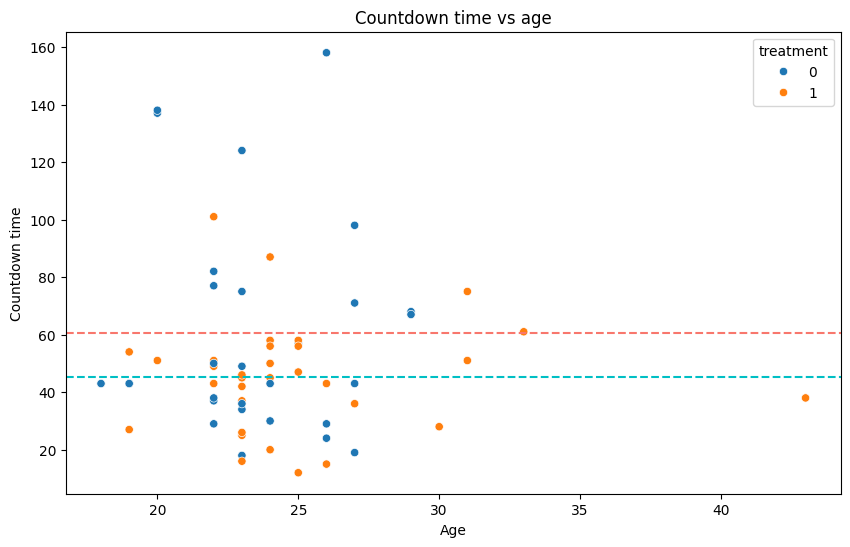

In [ ]:
# Plotting with seaborn

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='countdown_time', hue='treatment')
plt.axhline(mean_ctr, linestyle='--', color='#F8776D')
plt.axhline(mean_trt, linestyle='--', color='#00BFC4')
plt.xlabel('Age')
plt.ylabel('Countdown time')
plt.title('Countdown time vs age')
plt.show()


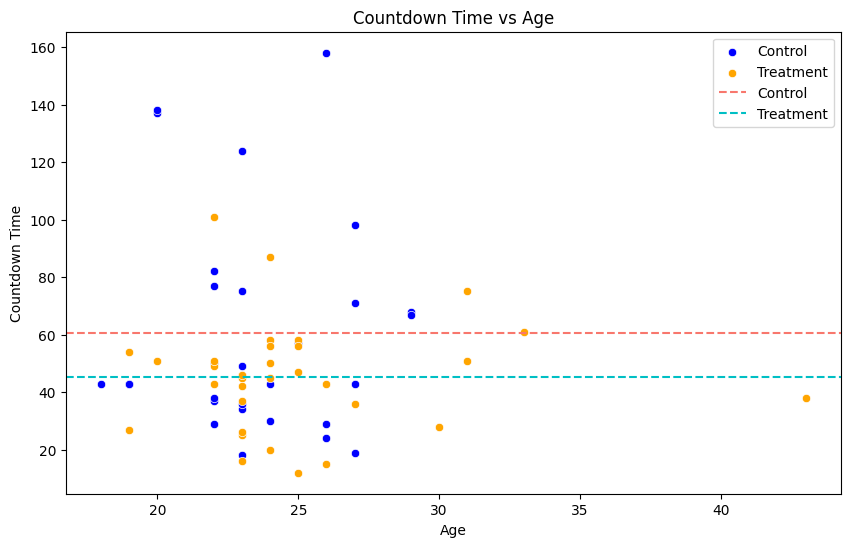

In [ ]:
# Plotting with seaborn and custom legends
plt.figure(figsize=(10, 6))
sns.scatterplot(data[data['treatment']==0], x='Age', y='countdown_time', color='blue', label='Control')
sns.scatterplot(data[data['treatment']==1], x='Age', y='countdown_time', color='orange', label='Treatment')
# sns.scatterplot(data=data, x='Age', y='countdown_time', hue='treatment')
plt.axhline(mean_ctr, linestyle='--', color='#F8776D', label='Control')
plt.axhline(mean_trt, linestyle='--', color='#00BFC4', label='Treatment')
plt.xlabel('Age')
plt.ylabel('Countdown Time')
plt.title('Countdown Time vs Age')
plt.legend() # Show the legend
plt.show()


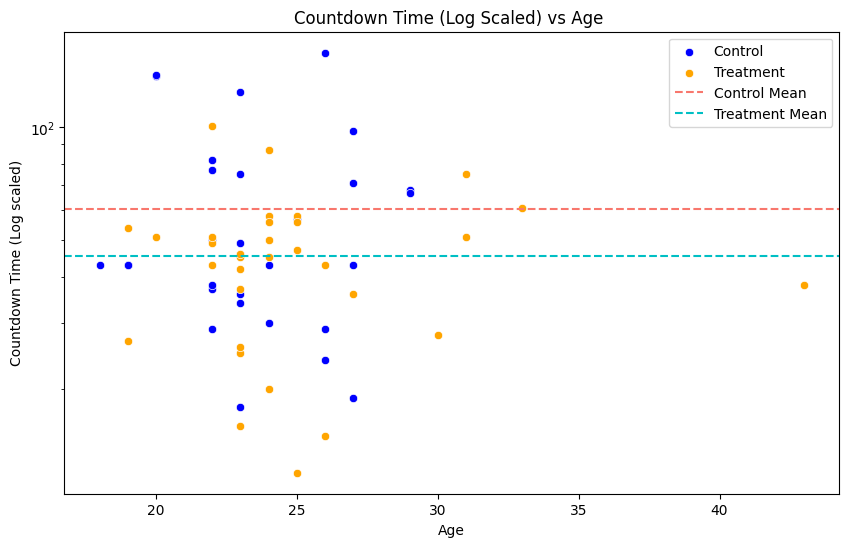

In [ ]:
# Plotting with seaborn and custom legends and log scale
plt.figure(figsize=(10, 6))
sns.scatterplot(data[data['treatment']==0], x='Age', y='countdown_time', color='blue', label='Control')
sns.scatterplot(data[data['treatment']==1], x='Age', y='countdown_time', color='orange', label='Treatment')
# sns.scatterplot(data=data, x='Age', y='countdown_time', hue='treatment')
plt.axhline(mean_ctr, linestyle='--', color='#F8776D', label='Control Mean')
plt.axhline(mean_trt, linestyle='--', color='#00BFC4', label='Treatment Mean')
plt.xlabel('Age')
plt.ylabel('Countdown Time (Log scaled)')
plt.title('Countdown Time (Log Scaled) vs Age ')
plt.yscale('log') # Set y-axis to log scale
plt.legend() # Show the legend
plt.show()


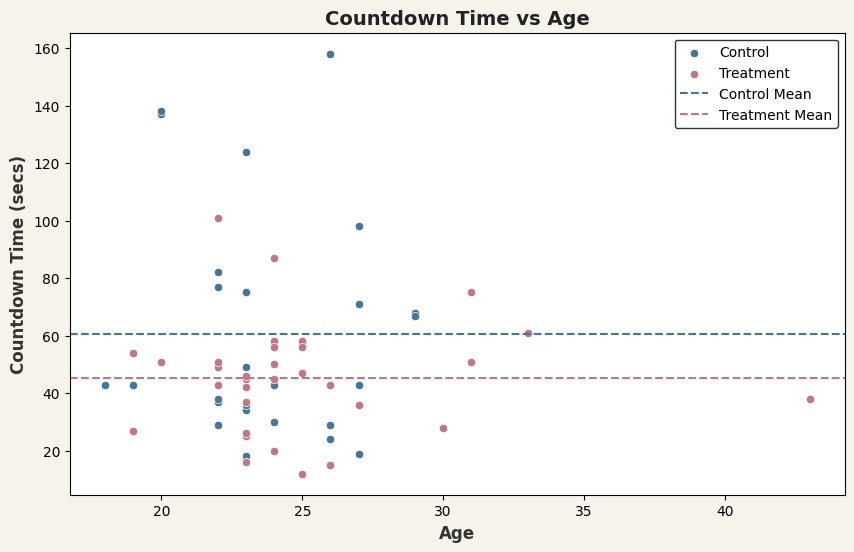

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors based on the vibrant palette
control_color = '#4a7493'  # Darker Slate Blue
treatment_color = '#c0768b'  # Deeper Dusty Pink

# Plotting with seaborn and custom legends
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[data['treatment'] == 0], x='Age', y='countdown_time',
                color=control_color, label='Control')
sns.scatterplot(data=data[data['treatment'] == 1], x='Age', y='countdown_time',
                color=treatment_color, label='Treatment')

# Add mean reference lines
plt.axhline(mean_ctr, linestyle='--', color=control_color, label='Control Mean')
plt.axhline(mean_trt, linestyle='--', color=treatment_color, label='Treatment Mean')

# Labels and title
plt.xlabel('Age', fontsize=12, fontweight='bold', color='#333333')
plt.ylabel('Countdown Time (secs)', fontsize=12, fontweight='bold', color='#333333')
plt.title('Countdown Time vs Age', fontsize=14, fontweight='bold', color='#222222')

# Customize legend
plt.legend(frameon=True, edgecolor='black')

# Match background to slides
plt.gcf().set_facecolor("#f6f3eb")  # Light beige background

# Show plot
plt.show()